In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def round_to_next_minute(date_str):
    # convert to datetime object
    dt = datetime.datetime.fromisoformat(date_str)

    # check if minute has already begun
    if dt.second > 0:
        # add the remaining seconds to round up to next minute
        dt += datetime.timedelta(seconds=(60 - dt.second))

    # set seconds to zero
    dt = dt.replace(second=0, microsecond=0)

    # convert to desired format
    new_date_str = dt.strftime("%Y-%m-%d %H:%M:%S")

    return new_date_str

In [2]:
def read_csv_round_dates(file_path):
    # read CSV file into Pandas dataframe
    df = pd.read_csv(file_path)

    # round date column to next minute
    df['datetime'] = df['time'].apply(round_to_next_minute)

    # convert to desired format
    df['datetime'] = pd.to_datetime(df['datetime']).dt.strftime("%Y-%m-%d %H:%M:%S")

    return df

In [3]:
test_ftx = read_csv_round_dates("../ftx/ftx_AAPLUSD.csv")

In [4]:
# Convert the 'date' column to a pandas datetime object
test_ftx['datetime'] = pd.to_datetime(test_ftx['datetime'])

# Extract the day from the datetime object
test_ftx['day'] = test_ftx['datetime'].dt.date

In [5]:
test_ftx["price*size"] = test_ftx["price"]*test_ftx["size"]

In [6]:
test_ftx['side'] = test_ftx['side'].replace({'buy': 1, 'sell': -1})
test_ftx['adjusted_size'] = test_ftx['side'] * test_ftx['size']

In [7]:
test_ftx.head()

,Unnamed: 0,id,price,size,side,liquidation,time,datetime,day,price*size,adjusted_size
0,0,5400896635,200.0,0.19,-1,False,2022-11-10T08:50:36.103957+00:00,2022-11-10 08:51:00,2022-11-10,38.00,-0.19
1,1,5400821897,250.0,0.48,1,False,2022-11-10T08:43:16.518694+00:00,2022-11-10 08:44:00,2022-11-10,120.00,0.48
2,2,5400805308,220.0,3.99,1,False,2022-11-10T08:41:35.975076+00:00,2022-11-10 08:42:00,2022-11-10,877.80,3.99
3,3,5400650726,176.0,0.07,1,False,2022-11-10T08:20:49.955655+00:00,2022-11-10 08:21:00,2022-11-10,12.32,0.07
4,4,5400639157,175.0,4.81,-1,False,2022-11-10T08:19:35.233163+00:00,2022-11-10 08:20:00,2022-11-10,841.75,-4.81


In [8]:
test_intra = pd.read_csv("../intraday/AAPL_US_data.csv")

In [9]:
test_intra["average"] = (test_intra["open"] + test_intra["high"] + test_intra["low"] + test_intra["close"]) / 4

In [10]:
# Convert the 'date' column to a pandas datetime object
test_intra['datetime'] = pd.to_datetime(test_intra['datetime'])

# Extract the day from the datetime object
test_intra['day'] = test_intra['datetime'].dt.date

In [11]:
test_intra.head()

,datetime,open,high,low,close,volume,average,day
0,2019-12-31 23:01:00,293.70,293.74,293.70,293.74,1000,293.720,2019-12-31
1,2019-12-31 23:02:00,293.75,293.75,293.74,293.74,2224,293.745,2019-12-31
2,2019-12-31 23:05:00,293.78,293.78,293.78,293.78,215,293.780,2019-12-31
3,2019-12-31 23:06:00,293.75,293.75,293.75,293.75,1000,293.750,2019-12-31
4,2019-12-31 23:09:00,293.75,293.75,293.75,293.75,103,293.750,2019-12-31


In [12]:
ftx_intra_min_df = pd.merge(test_ftx, test_intra[['datetime', 'average']], on='datetime', how='left')

In [13]:
ftx_intra_min_df["premium"] = (ftx_intra_min_df["price"] / ftx_intra_min_df["average"]) -1

In [35]:
ftx_intra_min_df

,Unnamed: 0,id,price,size,side,liquidation,time,datetime,day,price*size,adjusted_size,average,premium
0,0,5400896635,200.00,0.19,-1,False,2022-11-10T08:50:36.103957+00:00,2022-11-10 08:51:00,2022-11-10,38.0000,-0.19,NaN,NaN
1,1,5400821897,250.00,0.48,1,False,2022-11-10T08:43:16.518694+00:00,2022-11-10 08:44:00,2022-11-10,120.0000,0.48,NaN,NaN
2,2,5400805308,220.00,3.99,1,False,2022-11-10T08:41:35.975076+00:00,2022-11-10 08:42:00,2022-11-10,877.8000,3.99,NaN,NaN
3,3,5400650726,176.00,0.07,1,False,2022-11-10T08:20:49.955655+00:00,2022-11-10 08:21:00,2022-11-10,12.3200,0.07,NaN,NaN
4,4,5400639157,175.00,4.81,-1,False,2022-11-10T08:19:35.233163+00:00,2022-11-10 08:20:00,2022-11-10,841.7500,-4.81,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73489,3489,161294173,109.31,0.10,1,False,2020-11-02T14:27:51.437487+00:00,2020-11-02 14:28:00,2020-11-02,10.9310,0.10,109.0925,0.001994
73490,3490,161280575,109.23,0.10,1,False,2020-11-02T14:10:02.689138+00:00,2020-11-02 14:11:00,2020-11-02,10.9230,0.10,109.0225,0.001903
73491,3491,161273619,108.72,15.74,-1,False,2020-11-02T14:03:04.491554+00:00,2020-11-02 14:04:00,2020-11-02,1711.2528,-15.74,108.9275,-0.001905
73492,3492,161264574,109.40,0.91,1,False,2020-11-02T13:49:57.615938+00:00,2020-11-02 13:50:00,2020-11-02,99.5540,0.91,109.1200,0.002566


In [15]:
# separate unmatched rows into two dataframes
ftx_unmatched = test_ftx.loc[~test_ftx.index.isin(ftx_intra_min_df.index)]
intra_unmatched = test_intra.loc[~test_intra.index.isin(ftx_intra_min_df.index)]

In [16]:
ftx_daily = ftx_intra_min_df.groupby('day').agg({'price':'mean', 'size':'sum', 'premium':'mean', 'price*size':'sum', 'average':'mean', "adjusted_size":"sum"})

In [17]:
ftx_daily["weighted_price"] = ftx_daily["price*size"] / ftx_daily["size"]

In [18]:
ftx_daily["weighted_average_premium"] = ftx_daily["premium"] / ftx_daily["size"]

In [19]:
ftx_daily["absolute_volume"] = ftx_daily["price*size"]

In [21]:
ftx_daily['count'] = test_ftx.groupby('day')['id'].count()

In [22]:
ftx_daily.head()

,price,size,premium,price*size,average,adjusted_size,weighted_price,weighted_average_premium,absolute_volume,count
day,,,,,,,,,,
2020-11-02,109.212778,39.93,0.001241,4352.1402,109.077551,1.77,108.994245,0.000031,4352.1402,18
2020-11-03,110.253750,54.29,0.004566,6019.3902,109.918375,53.39,110.874750,0.000084,6019.3902,16
2020-11-04,113.028696,63.32,-0.000366,7286.9356,113.791327,44.70,115.081105,-0.000006,7286.9356,46
2020-11-05,117.778235,34.68,0.001717,4091.7026,118.079367,-19.22,117.984504,0.000050,4091.7026,34
2020-11-06,117.915085,128.46,0.004317,15115.9100,117.305820,-67.10,117.670170,0.000034,15115.9100,59


In [23]:
buy_df = test_ftx[test_ftx['side']== 1]
sell_df = test_ftx[test_ftx['side']== -1]

In [24]:
ftx_daily['WAP_buy'] = buy_df.groupby('day').apply(lambda x: (x['price']*x['size']).sum() / x['size'].sum())
ftx_daily['WAP_sell'] = sell_df.groupby('day').apply(lambda x: (x['price']*x['size']).sum() / x['size'].sum())

In [25]:
ftx_daily.head()

,price,size,premium,price*size,average,adjusted_size,weighted_price,weighted_average_premium,absolute_volume,count,WAP_buy,WAP_sell
day,,,,,,,,,,,,
2020-11-02,109.212778,39.93,0.001241,4352.1402,109.077551,1.77,108.994245,0.000031,4352.1402,18,109.371362,108.582144
2020-11-03,110.253750,54.29,0.004566,6019.3902,109.918375,53.39,110.874750,0.000084,6019.3902,16,110.879131,110.350667
2020-11-04,113.028696,63.32,-0.000366,7286.9356,113.791327,44.70,115.081105,-0.000006,7286.9356,46,115.384147,113.323072
2020-11-05,117.778235,34.68,0.001717,4091.7026,118.079367,-19.22,117.984504,0.000050,4091.7026,34,118.115951,117.946801
2020-11-06,117.915085,128.46,0.004317,15115.9100,117.305820,-67.10,117.670170,0.000034,15115.9100,59,118.046750,117.552012


In [26]:
daily_df = pd.read_csv("../daily_data/AAPL.O.csv")

In [27]:
daily_df.head()

,Date,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
0,2020-01-02,75.150000,75.0875,73.7975,74.0600,283480,135647456
1,2020-01-03,75.145000,74.3575,74.1250,74.2875,280940,146535512
2,2020-01-06,74.990000,74.9500,73.1875,73.4475,242861,118578576
3,2020-01-07,75.225000,74.5975,74.3700,74.9600,227868,111510620
4,2020-01-08,76.109975,75.7975,74.2890,74.2900,261770,132363784


In [29]:
daily_df["average"] = (daily_df["OPEN"] + daily_df["HIGH"] + daily_df["LOW"]+ daily_df["CLOSE"]) / 4

In [33]:
daily_df["abs_trade_size"] = daily_df["VOLUME"] * daily_df["average"]

In [31]:
daily_df["avg_trade_size"] = daily_df["average"] * daily_df["VOLUME"] / daily_df["COUNT"]

In [34]:
daily_df.head()

,Date,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,average,abs_trade_size,avg_trade_size
0,2020-01-02,75.150000,75.0875,73.7975,74.0600,283480,135647456,74.523750,1.010896e+10,35660.212710
1,2020-01-03,75.145000,74.3575,74.1250,74.2875,280940,146535512,74.478750,1.091378e+10,38847.375825
2,2020-01-06,74.990000,74.9500,73.1875,73.4475,242861,118578576,74.143750,8.791860e+09,36201.202722
3,2020-01-07,75.225000,74.5975,74.3700,74.9600,227868,111510620,74.788125,8.339670e+09,36598.689537
4,2020-01-08,76.109975,75.7975,74.2890,74.2900,261770,132363784,75.121619,9.943382e+09,37985.184391


In [34]:
# Fill missing values with NaN using forward fill
ftx_intra_min_df['average'].fillna(method='ffill', inplace=True)

# Fill remaining NaN values with the interpolated values
ftx_intra_min_df['average'].interpolate(method='linear', inplace=True)

ftx_intra_min_df['average'].fillna(method='ffill', inplace=True)
ftx_intra_min_df['average'].fillna(method='bfill', inplace=True)

# Fill remaining NaN values with the interpolated values
ftx_intra_min_df['average'].interpolate(method='linear', inplace=True)

In [35]:
ftx_intra_min_df.head()

,Unnamed: 0,id,price,size,side,liquidation,time,datetime,day,price*size,adjusted_size,average,premium
0,0,5400896635,200.0,0.19,-1,False,2022-11-10T08:50:36.103957+00:00,2022-11-10 08:51:00,2022-11-10,38.00,-0.19,135.47,NaN
1,1,5400821897,250.0,0.48,1,False,2022-11-10T08:43:16.518694+00:00,2022-11-10 08:44:00,2022-11-10,120.00,0.48,135.47,NaN
2,2,5400805308,220.0,3.99,1,False,2022-11-10T08:41:35.975076+00:00,2022-11-10 08:42:00,2022-11-10,877.80,3.99,135.47,NaN
3,3,5400650726,176.0,0.07,1,False,2022-11-10T08:20:49.955655+00:00,2022-11-10 08:21:00,2022-11-10,12.32,0.07,135.47,NaN
4,4,5400639157,175.0,4.81,-1,False,2022-11-10T08:19:35.233163+00:00,2022-11-10 08:20:00,2022-11-10,841.75,-4.81,135.47,NaN


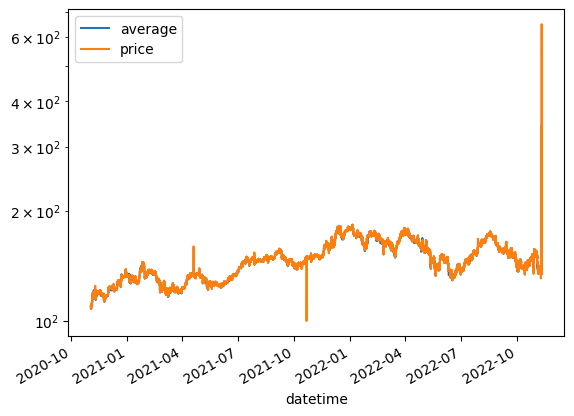

In [39]:
# plot the data
ftx_intra_min_df.plot(x="datetime", y=['average', 'price'], kind='line')
plt.yscale("log")

# show the plot
plt.show()